What are the most demanded skills for the top 3 most popular data roles?

Methodology:

Clean-up skill column

Calculate skill count based on job_title_short

Calculate skill percentage

Plot final findings

Note
Original Exploration
13_Matplotlib_Format_Charts.ipynb

In [15]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

#Loading data
df = pd.read_csv("hf://datasets/lukebarousse/data_jobs/data_jobs.csv")

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#converted to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [16]:
df_US = df[df['job_country']=='United States']

In [17]:
df_skills = df_US.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,python,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,c++,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,java,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,matlab,"{'cloud': ['aws'], 'libraries': ['tensorflow',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,NaN,Tenet3,r,"{'programming': ['python', 'matlab', 'r']}"
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,NaN,NaN,NaN,Axelon Services Corporation,NaN,NaN
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,NaN,NaN,NaN,PG&E Corporation,sql,"{'analyst_tools': ['tableau'], 'programming': ..."
785705,Data Analyst,Expert Business Data Analyst - Now Hiring,"Oakland, CA",via Snagajob,Full-time,False,"California, United States",2023-01-09 06:00:25,False,False,United States,NaN,NaN,NaN,PG&E Corporation,python,"{'analyst_tools': ['tableau'], 'programming': ..."


In [18]:
#Group by Job_Country and job_title short
df_skills_count =df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               38
            Cloud Engineer                 27
            Data Analyst                  387
            Data Engineer                4716
            Data Scientist               1166
                                         ... 
zoom        Machine Learning Engineer       5
            Senior Data Analyst            50
            Senior Data Engineer           30
            Senior Data Scientist          25
            Software Engineer              16
Length: 1870, dtype: int64

In [19]:
##Above is a series so we are creating a dataframe and name the count column as skill count
df_skills_count = df_skills_count.reset_index(name='skill_count')
df_skills_count


,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,38
1,airflow,Cloud Engineer,27
2,airflow,Data Analyst,387
3,airflow,Data Engineer,4716
4,airflow,Data Scientist,1166
...,...,...,...
1865,zoom,Machine Learning Engineer,5
1866,zoom,Senior Data Analyst,50
1867,zoom,Senior Data Engineer,30
1868,zoom,Senior Data Scientist,25


In [22]:
#Sorting the Dataframe
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

In [25]:
## Instead of hardcoding we are taking the unique jobtitles and then converting the array ouput to list 
job_titles = df_skills_count['job_title_short'].unique().tolist()

##We are pulling just the top 3 results and sorting it alphabetically
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

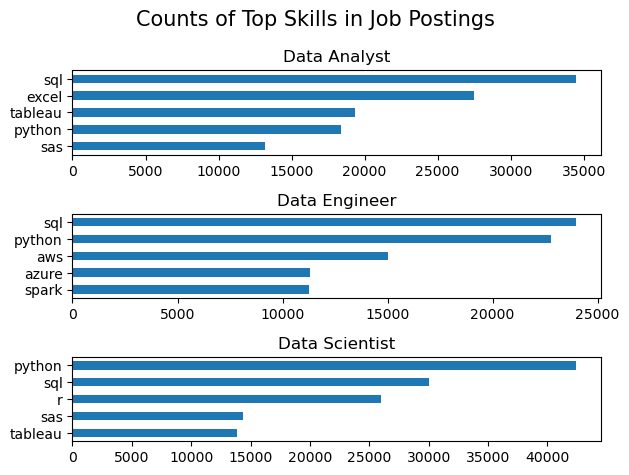

In [29]:

# Create a figure with multiple subplots stacked vertically, one subplot per job_title
fig, ax = plt.subplots(len(job_titles), 1)

# Loop through each job_title with its index
for i, job_title in enumerate(job_titles):
    # Filter top 5 skills for the current job_title and plot them as a horizontal bar chart on the i-th subplot
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    
    # Invert y-axis so the largest bar appears at the top
    ax[i].invert_yaxis()
    
    # Remove y-axis label for a cleaner look
    ax[i].set_ylabel('')
    
    # Remove legend since it's redundant (skill labels are already shown)
    ax[i].get_legend().remove()
    
    # Fix x-axis limit across all subplots for consistent scale
    #ax[i].set_xlim(0, 45000) # make the scales the same

# Add a main title for the entire figure
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)

# Adjust layout to prevent overlapping of titles and labels
fig.tight_layout() # fix the overlap

# Display the figure with all subplots
plt.show()


Convert Counts to Percentages: 

we want to add the % of skill in job posting

Focus: Counts don't show what portions of jobs are requesting these skills

So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. 

Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [30]:
# Use original df to get the count of job titles
df_job_title_count = df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

df_job_title_count

,job_title_short,jobs_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


Then we calculate the percentages. 
First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. 

Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [31]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,gdpr,Software Engineer,1,1814,0.055127
1866,ggplot2,Business Analyst,1,7382,0.013546
1867,wrike,Business Analyst,1,7382,0.013546
1868,workfront,Data Engineer,1,35080,0.002851


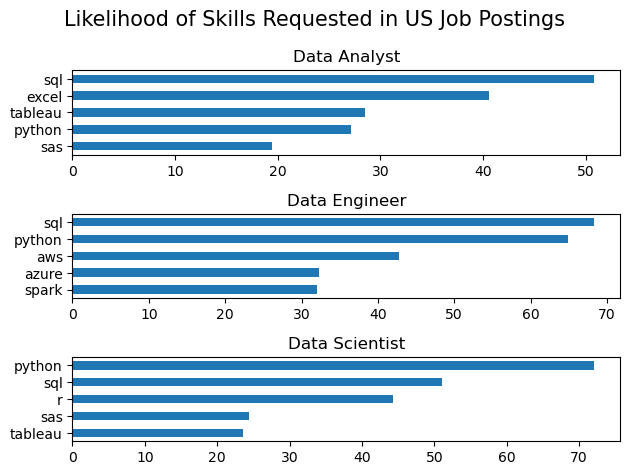

In [ ]:
##Ploting it again to show it with percentage now
import seaborn as sns
fig, ax = plt.subplots(len(job_titles), 1)

# Loop through each job_title with its index
for i, job_title in enumerate(job_titles):
    # Filter top 5 skills for the current job_title and plot them as a horizontal bar chart on the i-th subplot
    df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5) #.plot(kind='barh', x='job_skills', y='skill_percent', ax=ax[i], title=job_title)
    sns.barplot(data=df_skills_perc, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r ')
    # Invert y-axis so the largest bar appears at the top
    ax[i].invert_yaxis()
    
    # Remove y-axis label for a cleaner look
    ax[i].set_ylabel('')
    
    # Remove legend since it's redundant (skill labels are already shown)
    ax[i].get_legend().remove()
    
    # Fix x-axis limit across all subplots for consistent scale
    #ax[i].set_xlim(0, 45000) # make the scales the same

# Add a main title for the entire figure
fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)

# Adjust layout to prevent overlapping of titles and labels
fig.tight_layout() # fix the overlap

# Display the figure with all subplots
plt.show()


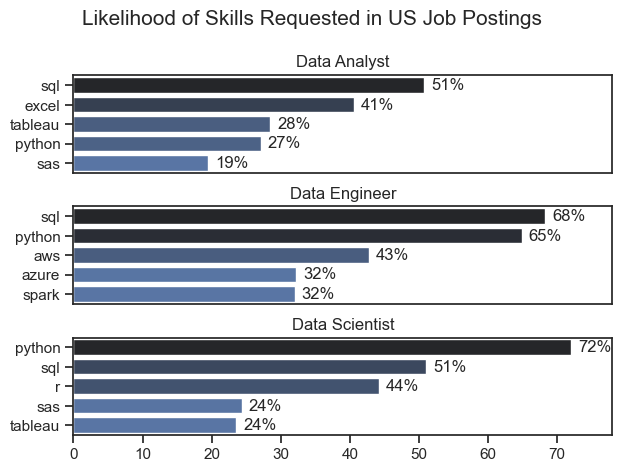

In [51]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()

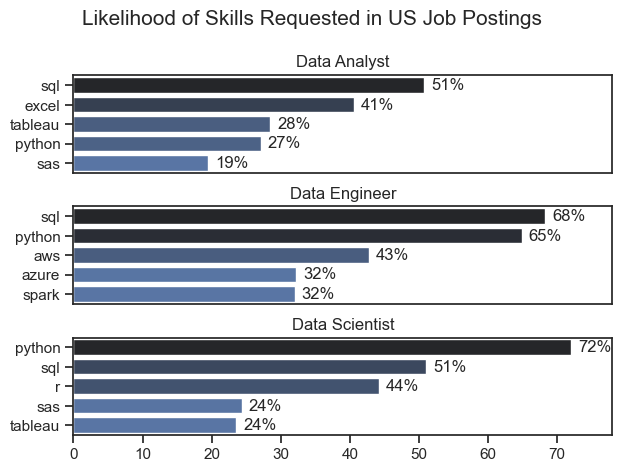

In [52]:
fig, ax = plt.subplots(len(job_titles), 1)


for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)
    # remove the x-axis tick labels for better readability
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    # label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in US Job Postings', fontsize=15)
fig.tight_layout(h_pad=.8)
plt.show()